<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Week1_Course4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def plot_series(time,series,start=0,end=None,format='-',label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [52]:
def trend(time, slope=0):
  return slope*time


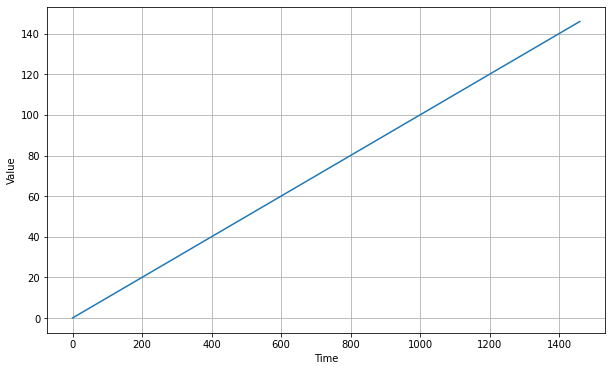

In [53]:
time = np.arange(4*365+1)
series = trend(time,0.1)
plt.figure(figsize=(10,6))
plot_series(time,series,0)
plt.show()

In [54]:
def white_noise(time, noise_level=1):
  rnd = np.random.RandomState(1234567)
  noise_samples = rnd.randn(len(time))*noise_level
  return noise_samples

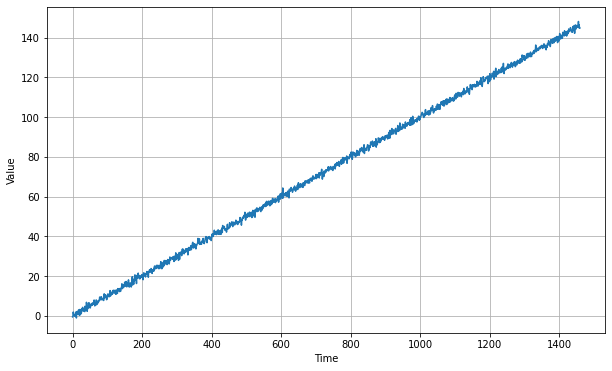

In [55]:
series = series + white_noise(time)
plt.figure(figsize=(10,6))
plot_series(time,series,0)


In [56]:
time_split = 1000
train_time = time[:time_split]
valid_time = time[time_split:]
x_train = series[:time_split]
x_valid = series[time_split:]

In [57]:
def autocorrelation(time,amplitude,seed=None):
  rnd = np.random.RandomState(seed)
  lag1 = 50
  lag2 = 33
  lag = max(lag1, lag2)
  p1 = 0.5
  p2 = -0.1
  ar = rnd.randn(len(time)+lag)
  ar[:lag] = 100
  for step in range(lag, len(time)+lag):
    ar[step] += p1*ar[step-lag]
    ar[step] += p2*ar[step-min(lag1,lag2)]
  return ar[50:]*amplitude


In [80]:
def autocorrelation(time, amplitude,seed=None):
  rnd = np.random.RandomState(seed)
  p1 = 0.8
  ar = rnd.randn(len(time)+1)

  for step in range(1, len(time)+1):
    ar[step] += p1*ar[step-1]
  return ar[1:]*amplitude

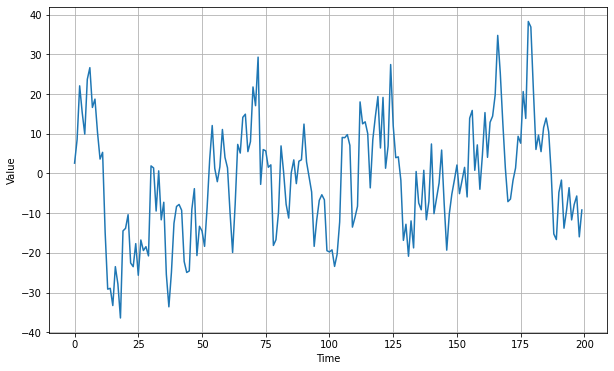

In [81]:
series = autocorrelation(time, 10, seed=42)
plt.figure(figsize=(10,6))
plot_series(time[:200], series[:200])
plt.show()

1461
1461
1461


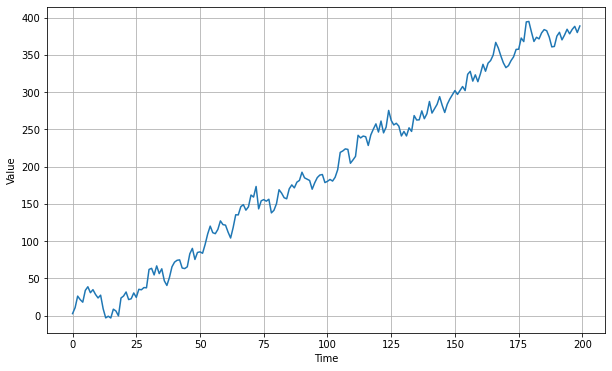

In [82]:
print(len(time))
y1 = autocorrelation(time,10,seed=42)
y2 = trend(time,2)
print(len(y1))
print(len(y2)) 
plt.figure(figsize=(10,6))
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

In [83]:
((np.arange(34)+21)%17)/3

array([1.33333333, 1.66666667, 2.        , 2.33333333, 2.66666667,
       3.        , 3.33333333, 3.66666667, 4.        , 4.33333333,
       4.66666667, 5.        , 5.33333333, 0.        , 0.33333333,
       0.66666667, 1.        , 1.33333333, 1.66666667, 2.        ,
       2.33333333, 2.66666667, 3.        , 3.33333333, 3.66666667,
       4.        , 4.33333333, 4.66666667, 5.        , 5.33333333,
       0.        , 0.33333333, 0.66666667, 1.        ])

In [84]:
print((np.arange(34)+21)%17)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16  0  1  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16  0  1  2  3]


In [85]:
def seasonal_pattern(st):
  return np.where(st<0.4,np.cos(2*np.pi*st),1/np.exp(3*st))
def seasonality(time,period,amplitude=1,phase=0):
  st = ((time+phase)%period) /period
  return amplitude*seasonal_pattern(st)


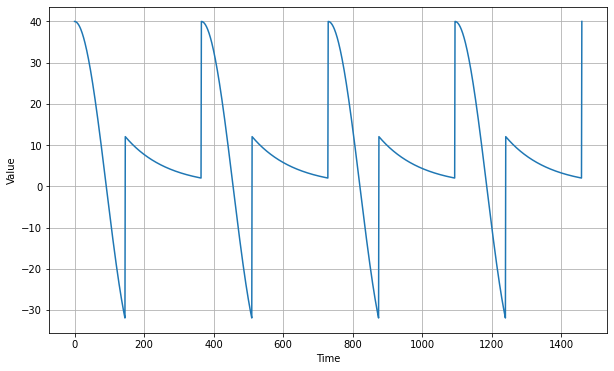

In [86]:
amplitude = 40
series=seasonality(time,period=365,amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time,series)

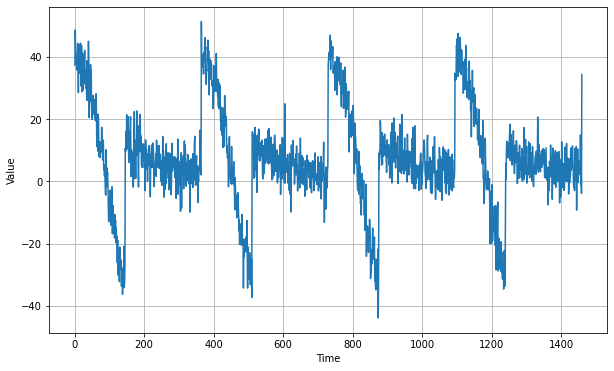

In [87]:
series += white_noise(time,5)
plt.figure(figsize=(10,6))
plot_series(time,series)

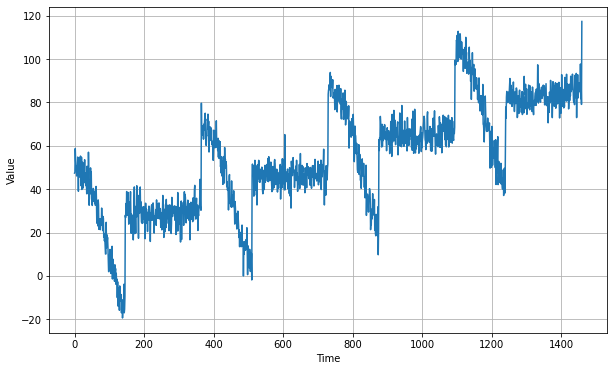

In [88]:
baseline = 10
series += (baseline + trend(time,slope=0.05))
plt.figure(figsize=(10,6))
plot_series(time,series)

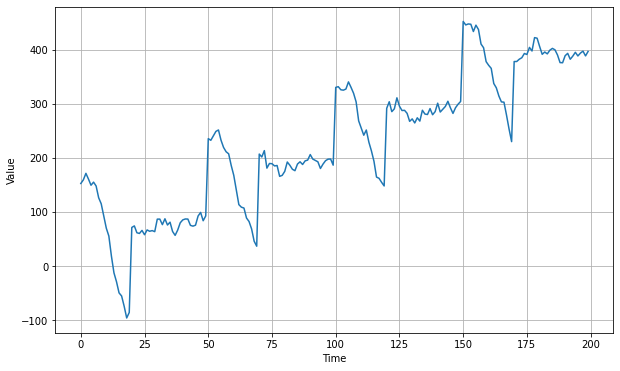

In [89]:
series = autocorrelation(time,10,42) + trend(time,slope=2) + seasonality(time,period=50, amplitude=150) 
plt.figure(figsize=(10,6))
plot_series(time[:200],series[:200])

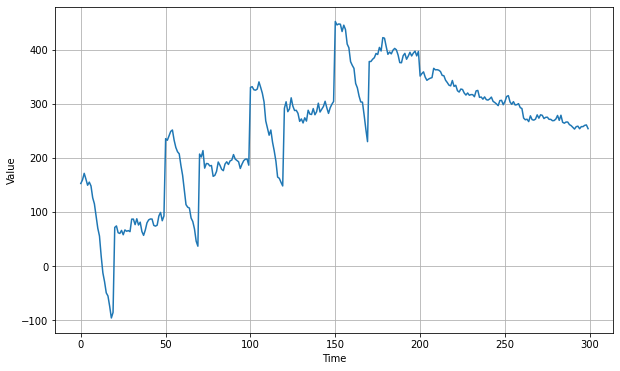

In [90]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:]=series2[200:]
plt.figure(figsize=(10,6))
plot_series(time[:300],series[:300])

In [91]:
def impulse_train(time,num_impulses, amplitude=1,seed=None):
  rnd=np.random.RandomState(None)
  impulse_indices = rnd.randint(len(time), size=num_impulses)
  series = np.zeros(len(time))
  for i in impulse_indices:
    series[i] += rnd.rand()*amplitude
  return series

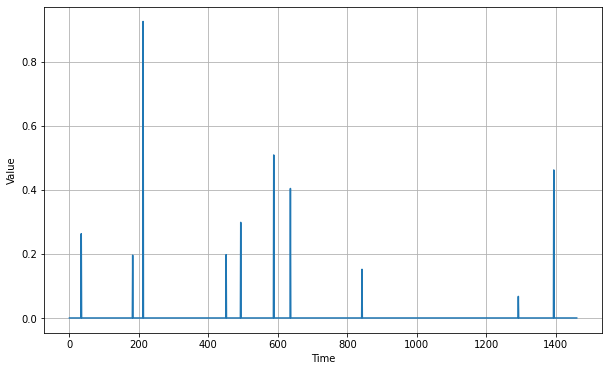

In [92]:
series = impulse_train(time,10)
plt.figure(figsize=(10,6))
plot_series(time,series)

In [105]:
def autocorrelation(source, phi):
  ar = source.copy()
  for i,val in enumerate(source):
    for k,v in phi.items():
      if i-k > 0:
        ar[i] += val*ar[i-k]
  return ar


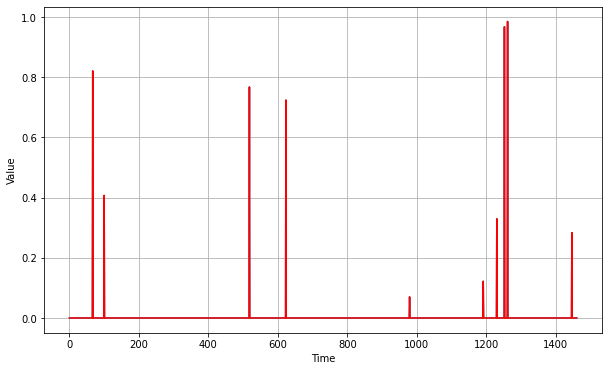

In [106]:
signal = impulse_train(time,10,amplitude=1,seed=42)
phi = {1:0.7, 50:0.2}
series = autocorrelation(signal,phi)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.plot(time,signal, "r-")
plt.show()

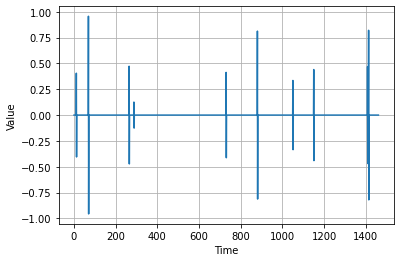

In [97]:
diffSeries = series[1:]-series[:-1]
plot_series(time[1:],diffSeries)

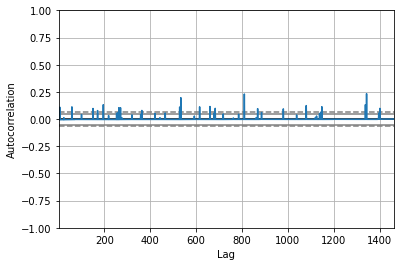

In [100]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

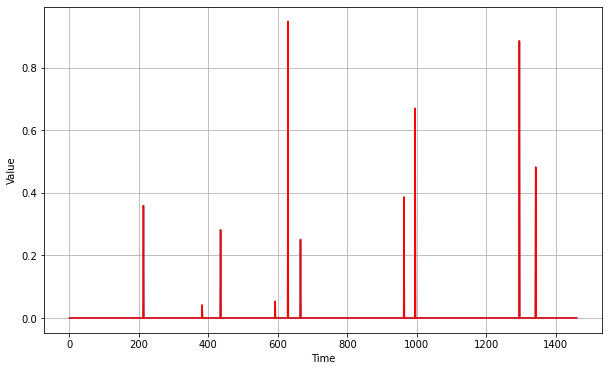

In [104]:
signal = impulse_train(time,10,amplitude=1,seed=42)
phi = {1:0.99}
series = autocorrelation(signal,phi)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.plot(time,signal, "r-")
plt.show()